In [1]:
import numpy as np
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

from six import StringIO
from IPython.display import Image

%matplotlib inline

In [2]:
#features and label variabel
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
print(np.unique(weather))
print(np.unique(temp))

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']


In [4]:
le = LabelEncoder()

weather_encoded = le.fit_transform(weather)
temp_encoded = le.fit_transform(temp)

print("Weather:", weather_encoded)
print("Temp:", temp_encoded)

Weather: [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [5]:
features = list(zip(weather_encoded, temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [6]:
label = le.fit_transform(play)
label

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [7]:
model = GaussianNB()

model.fit(features, label)

predicted = model.predict([[0, 2]])  # 0: Overcast, 2: Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


In [8]:
y_pred = model.predict(features)
print(confusion_matrix(label, y_pred))

[[3 2]
 [2 7]]


In [9]:
print(classification_report(label, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [10]:
model.predict([[2, 0]])

array([0])

### NAIVE BAYES WITH MULTIPLE LABELS

In [11]:
wine = load_wine()

In [12]:
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']


In [13]:
wine.data.shape

(178, 13)

In [14]:
wine.data[:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

In [15]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

In [17]:
# instantiate the model
gnb = GaussianNB()

# train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [18]:
# predict the test dataset
y_pred = gnb.predict(X_test)

In [19]:
print(classification_report(y_train, gnb.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.98      0.99        52
           2       0.97      1.00      0.99        34

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.94      0.79      0.86        19
           2       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


Machine learning procedure

1. Load data
2. Check data, cleaning, understanding data, EDA
3. Train test split
4. Cleaning data, handling outlier, feature engineering
5. Model call. Panggil module
6. Model training. Module.fit
7. Model predict test. Metrics model
8. Conclusion

### DECISION TREE

In [21]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv",
                   header=None,
                   names=col_names)

pima.drop(0, axis=0, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [22]:
pima = pima.apply(pd.to_numeric, axis=1, errors="coerce")

In [23]:
pima.dropna(inplace=True)

In [24]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols].copy()
y = pima["label"].copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76       146
         1.0       0.57      0.47      0.52        85

    accuracy                           0.68       231
   macro avg       0.65      0.63      0.64       231
weighted avg       0.67      0.68      0.67       231



In [28]:
dot_data = StringIO()
export_graphviz(clf, 
    out_file=dot_data, 
    class_names=['0','1'], # the target names.
    feature_names=feature_cols, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

InvocationException: GraphViz's executables not found

- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       354
         1.0       0.68      0.57      0.62       183

    accuracy                           0.76       537
   macro avg       0.74      0.72      0.72       537
weighted avg       0.76      0.76      0.76       537

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82       146
         1.0       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



### RANDOM FOREST

In [29]:
iris = load_iris()

In [30]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [32]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
feature_names = [i[:-5] for i in iris.feature_names]

data = pd.DataFrame(iris.data, columns=feature_names)
data["species"] = iris.target
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
data.shape

(150, 5)

In [35]:
X = pd.DataFrame(iris.data, columns=feature_names)
y = pd.Series(iris.target, name="species")

X = data.iloc[:, :-1].copy()
y = data["species"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [36]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [38]:
clf.predict([[3, 5, 4, 2]])

/Users/dearishanti/Desktop/hacktiv/.env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [39]:
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [40]:
clf.feature_importances_

array([0.08622577, 0.02754444, 0.38354713, 0.50268266])

In [41]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False) 

feature_imp

petal width (cm)     0.502683
petal length (cm)    0.383547
sepal length (cm)    0.086226
sepal width (cm)     0.027544
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


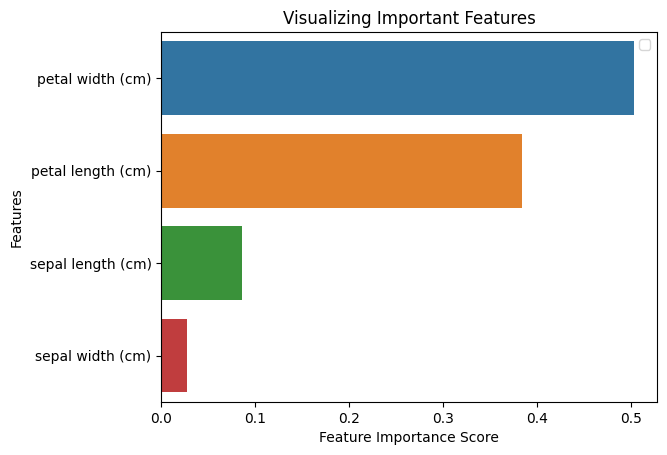

In [42]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Generating the Model on Selected Features

In [43]:
X_train.head()

,sepal length,sepal width,petal length,petal width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [44]:
X_train.head()

,sepal length,sepal width,petal length,petal width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [45]:
X = data[["petal length", "petal width"]].copy()
y = data["species"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [47]:
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.97      0.98        32
           2       0.97      1.00      0.99        37

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### SVM

In [48]:
cancer = load_breast_cancer()

In [49]:
print("Features:", cancer.feature_names)
print("Labels:", cancer.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']


In [50]:
cancer.data.shape

(569, 30)

In [51]:
print(cancer.data[:2])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


In [52]:
print(cancer.target[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

In [54]:
clf = SVC(kernel="linear")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9636363636363636
Recall: 0.9814814814814815


### Multiple Algorithm on Dataset

In [57]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

In [58]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
train.shape

(614, 13)

In [60]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
train.fillna(train.mean(), inplace=True)
train.isna().sum()

/var/folders/b1/83_jy37x0w3dtq1fz4vcwjsh0000gn/T/ipykernel_6770/2825488611.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(), inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)

In [64]:
train.isna().sum().sum()

0

In [65]:
train["Loan_Amount_Term"] = np.log(train["Loan_Amount_Term"])

In [66]:
X.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [67]:
X.shape

(150, 2)

In [68]:
X = pd.get_dummies(X)

In [69]:
X.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [70]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model=LogisticRegression(max_iter=1000)

model.fit(X_train,y_train)
y_pred_1 = model.predict(X_test)

In [73]:
print(accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [74]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_2 = dt.predict(X_test)

In [75]:
print(accuracy_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [76]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_3 = rf.predict(X_test)

In [77]:
print(accuracy_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [78]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_4 = svm_model.predict(X_test)

In [79]:
print(accuracy_score(y_test, y_pred_4))
print(confusion_matrix(y_test, y_pred_4))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [80]:
nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred_5 = nb.predict(X_test)

In [81]:
print(accuracy_score(y_test, y_pred_5))
print(confusion_matrix(y_test, y_pred_5))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [82]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_6 = knn.predict(X_test)

In [83]:
print(accuracy_score(y_test, y_pred_6))
print(confusion_matrix(y_test, y_pred_6))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [84]:
print("Logistic Regression:", accuracy_score(y_test,y_pred_1))
print("Decision Tree:", accuracy_score(y_test,y_pred_2))
print("Random Forest:", accuracy_score(y_test,y_pred_3))
print("SVM:", accuracy_score(y_test,y_pred_4))
print("Naive Bayes:", accuracy_score(y_test,y_pred_5))
print("KNN:", accuracy_score(y_test,y_pred_6))

Logistic Regression: 1.0
Decision Tree: 1.0
Random Forest: 1.0
SVM: 1.0
Naive Bayes: 1.0
KNN: 1.0
